In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### The above codes are libraries that will be used in the project

In [4]:
df = pd.read_csv('nigeria_houses.csv')
df.head(10)
# loading the dataset

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price Category
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000,1
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000,1
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000,1
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000,1
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000,1
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000,1
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000,1
7,2.0,2.0,3.0,6.0,Detached Bungalow,Epe,Lagos,12000000,1
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000,1
9,4.0,4.0,5.0,5.0,Detached Duplex,Ajah,Lagos,60000000,1


In [5]:
df.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price Category
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000,1
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000,1
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000,1
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000,1
24325,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000,1


In [6]:
df.info()
# check for null vlues and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        24326 non-null  float64
 1   bathrooms       24326 non-null  float64
 2   toilets         24326 non-null  float64
 3   parking_space   24326 non-null  float64
 4   title           24326 non-null  object 
 5   town            24326 non-null  object 
 6   state           24326 non-null  object 
 7   price           24326 non-null  int64  
 8   price Category  24326 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.7+ MB


In [7]:
df.shape # check the number of rows and columns

(24326, 9)

In [8]:
df.value_counts() # check the distribution of the target variable

bedrooms  bathrooms  toilets  parking_space  title            town      state  price         price Category
5.0       5.0        6.0      4.0            Detached Duplex  Lekki     Lagos  120000000     1                 178
                                                                               130000000     1                 144
                                                                               140000000     1                  88
                                                                               90000000      1                  82
                                                                               125000000     1                  80
                                                                                                              ... 
9.0       9.0        1.0      4.0            Detached Duplex  Lekki     Lagos  320000000     1                   1
                                                                               35000000

In [9]:
print("\nNumerical summary:")
print(df[["bedrooms","bathrooms","toilets","parking_space","price"]].describe())



Numerical summary:
           bedrooms     bathrooms       toilets  parking_space         price
count  24326.000000  24326.000000  24326.000000   24326.000000  2.432600e+04
mean       4.338814      4.600798      5.176355       4.041725  3.013802e+08
std        1.138497      1.163161      1.226253       1.399936  1.220403e+10
min        1.000000      1.000000      1.000000       1.000000  9.000000e+04
25%        4.000000      4.000000      5.000000       4.000000  5.200000e+07
50%        4.000000      5.000000      5.000000       4.000000  8.500000e+07
75%        5.000000      5.000000      6.000000       4.000000  1.600000e+08
max        9.000000      9.000000      9.000000       9.000000  1.800000e+12


Top House Types:
title
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: count, dtype: int64

Top Towns:
town
Lekki                   10895
Ajah                     2164
Ikoyi                    1547
Ikeja                     688
Ibeju Lekki               503
Victoria Island (VI)      496
Port Harcourt             435
Ibadan                    413
Gwarinpa                  391
Magodo                    375
Name: count, dtype: int64

Top States:
state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Abia               9
Nasarawa           9
Kwara              9
Ekiti              9
Kogi    

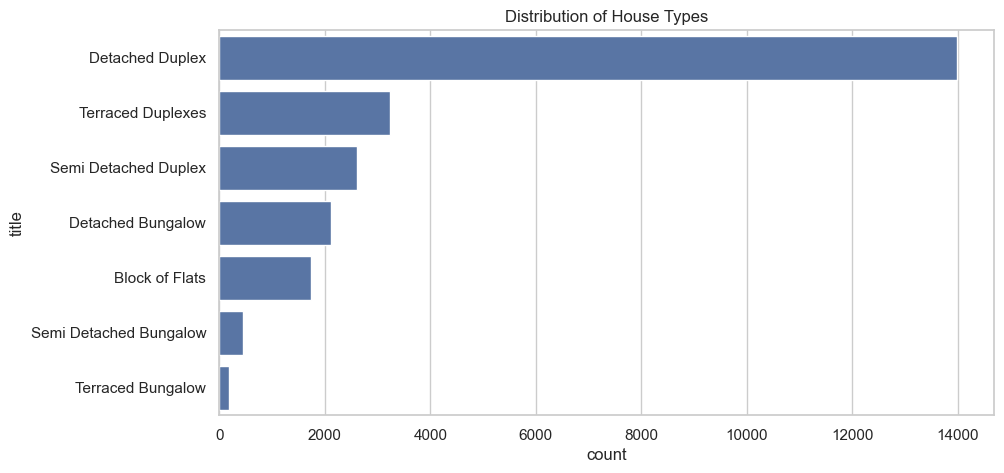

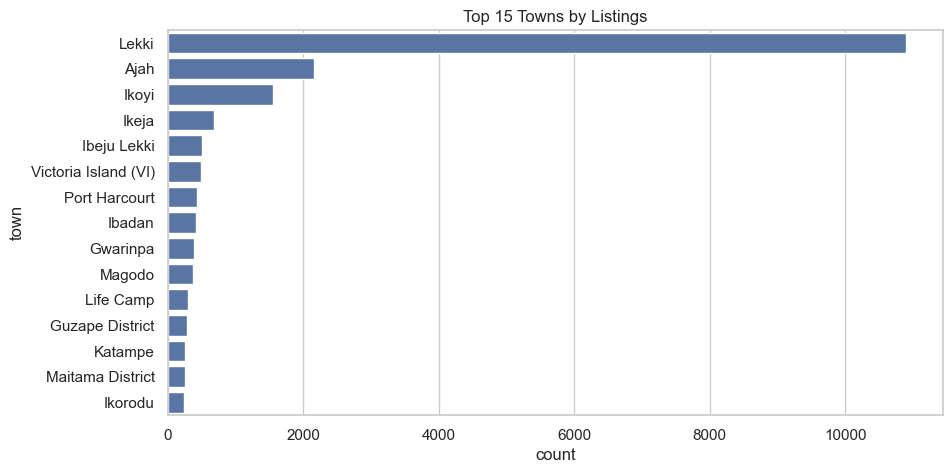

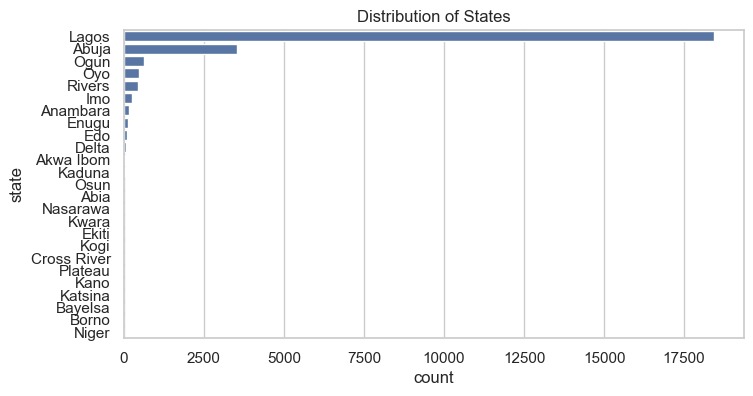

In [10]:
#  Categorical counts to see dominant categories

# House types
print("Top House Types:")
print(df["title"].value_counts().head(10))  # top 10 types

# Towns
print("\nTop Towns:")
print(df["town"].value_counts().head(10))   # top 10 towns

# States
print("\nTop States:")
print(df["state"].value_counts())           # all states

# Optional: visualize with bar plots
plt.figure(figsize=(10,5))
sns.countplot(y=df["title"], order=df["title"].value_counts().index)
plt.title("Distribution of House Types")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df["town"], order=df["town"].value_counts().head(15).index)
plt.title("Top 15 Towns by Listings")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y=df["state"], order=df["state"].value_counts().index)
plt.title("Distribution of States")
plt.show()

In [11]:
# House type by State
print("\nHouse Type distribution across States:")
house_state = pd.crosstab(df["state"], df["title"])
print(house_state)




House Type distribution across States:
title        Block of Flats  Detached Bungalow  Detached Duplex  \
state                                                             
Abia                      5                  2                2   
Abuja                   215                363             1400   
Akwa Ibom                 3                  8               11   
Anambara                 21                 21               21   
Bayelsa                   1                  0                1   
Borno                     0                  0                0   
Cross River               1                  0                1   
Delta                    16                 18               22   
Edo                      43                 20               33   
Ekiti                     3                  3                1   
Enugu                    18                 27               53   
Imo                      86                 33              113   
Kaduna                

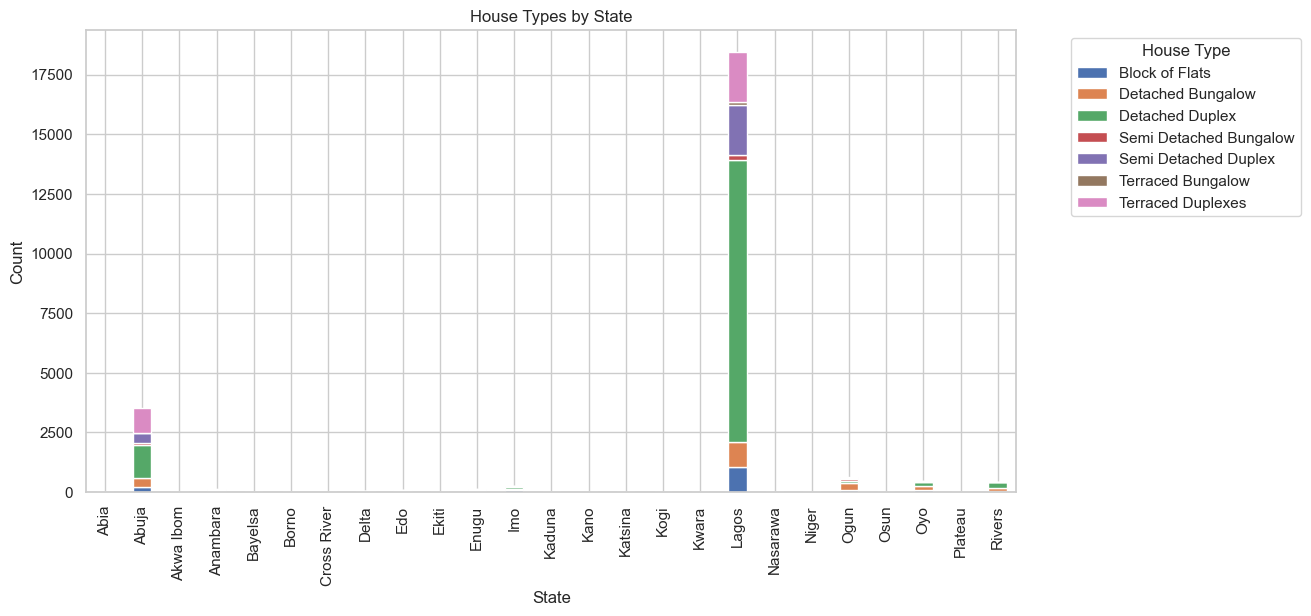

In [12]:
# Visualize the house type distribution across states
house_state.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("House Types by State")
plt.ylabel("Count")
plt.xlabel("State")
plt.legend(title="House Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
# House type by Town
print("\nHouse Type distribution across Towns:")
house_town = pd.crosstab(df["town"], df["title"])
print(house_town.head(10))  # show top 10 towns


House Type distribution across Towns:
title           Block of Flats  Detached Bungalow  Detached Duplex  \
town                                                                 
Aba                          4                  2                2   
Abeokuta North               0                  3                1   
Abeokuta South               5                 12                8   
Abraka                       1                  0                0   
Ado-Ekiti                    3                  3                1   
Ado-Odo/Ota                 13                 17                4   
Afijio                       1                  0                1   
Agbara                       0                  1                0   
Agbara-Igbesa                1                  3                1   
Agege                       29                 51               36   

title           Semi Detached Bungalow  Semi Detached Duplex  \
town                                                    

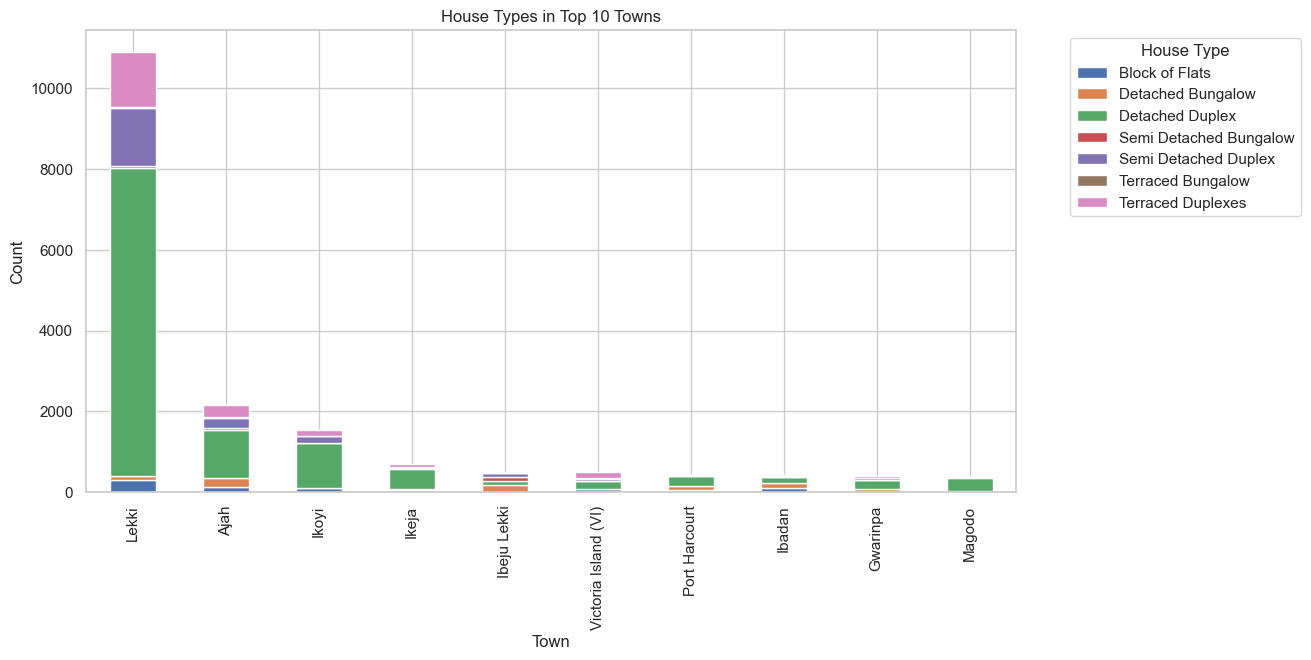

In [14]:
# Visualize top towns
top_towns = df["town"].value_counts().head(10).index
house_town.loc[top_towns].plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("House Types in Top 10 Towns")
plt.ylabel("Count")
plt.xlabel("Town")
plt.legend(title="House Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [15]:
# State vs Price Category
print("\nPrice Category distribution across States:")
state_category = pd.crosstab(df["state"], df["price Category"])
print(state_category)



Price Category distribution across States:
price Category   0      1
state                    
Abia             0      9
Abuja            9   3515
Akwa Ibom        0     25
Anambara         0    145
Bayelsa          0      2
Borno            0      2
Cross River      0      2
Delta            1     62
Edo              2     98
Ekiti            0      9
Enugu            1    127
Imo              0    246
Kaduna           1     22
Kano             0      2
Katsina          0      2
Kogi             0      8
Kwara            1      8
Lagos           54  18391
Nasarawa         1      8
Niger            0      1
Ogun            28    609
Osun             0     12
Oyo             17    460
Plateau          1      1
Rivers           0    444


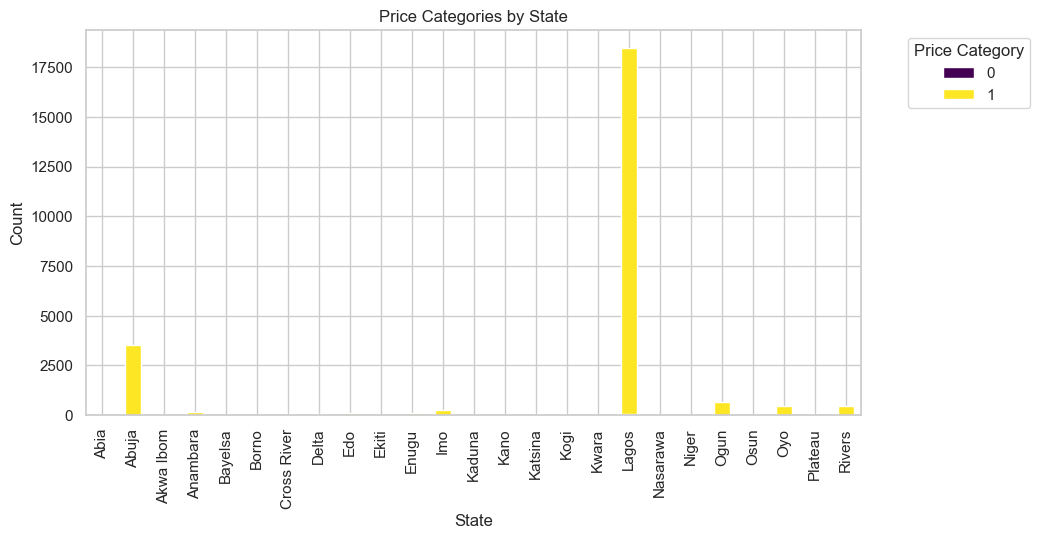

In [16]:
# Visualize
state_category.plot(kind="bar", stacked=True, figsize=(10,5), colormap="viridis")
plt.title("Price Categories by State")
plt.ylabel("Count")
plt.xlabel("State")
plt.legend(title="Price Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Data Transformation

In [17]:
# Feature Engineering
df["total_rooms"] = df["bedrooms"] + df["bathrooms"] + df["toilets"]
df["price_per_room"] = df["price"] / df["total_rooms"]
df.head()


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price Category,total_rooms,price_per_room
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000,1,16.0,2.812500e+07
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000,1,14.0,5.714286e+07
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000,1,14.0,8.571429e+06
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000,1,13.0,3.076923e+06
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000,1,13.0,5.769231e+06


In [18]:
# Define features and targets
X = df.drop(columns=["price", "price Category"])
y_reg = df["price"]
y_clf = df["price Category"]
X


,bedrooms,bathrooms,toilets,parking_space,title,town,state,total_rooms,price_per_room
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,16.0,2.812500e+07
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,14.0,5.714286e+07
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,14.0,8.571429e+06
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,13.0,3.076923e+06
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,13.0,5.769231e+06
...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,6.0,2.500000e+06
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,14.0,1.785714e+06
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,14.0,4.857143e+06
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,11.0,7.090909e+06


In [19]:
y_clf

0        1
1        1
2        1
3        1
4        1
        ..
24321    1
24322    1
24323    1
24324    1
24325    1
Name: price Category, Length: 24326, dtype: int64

In [20]:
y_reg

0        450000000
1        800000000
2        120000000
3         40000000
4         75000000
           ...    
24321     15000000
24322     25000000
24323     68000000
24324     78000000
24325     65000000
Name: price, Length: 24326, dtype: int64

In [21]:
# Columns to transform
num_cols = ["bedrooms", "bathrooms", "toilets", "parking_space", "total_rooms", "price_per_room"]
cat_cols = ["title", "town", "state"]
# Preprocessing pipelines

In [22]:
# Column Transformer: scale numeric, encode categorical
transformer = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Apply transformation
X_transformed = transformer.fit_transform(X)

# Check result
print("Transformed feature matrix shape:", X_transformed.shape)

Transformed feature matrix shape: (24326, 227)


### Visualizing Relationships between attributes 

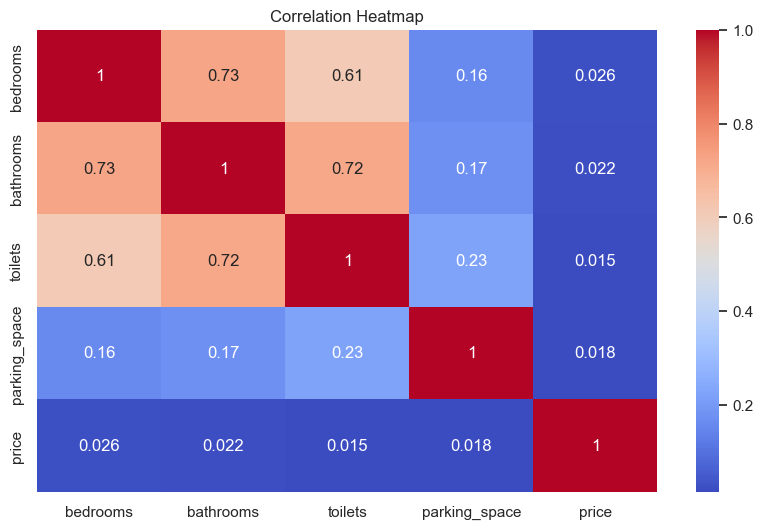

In [23]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df[["bedrooms", "bathrooms", "toilets", "parking_space", "price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

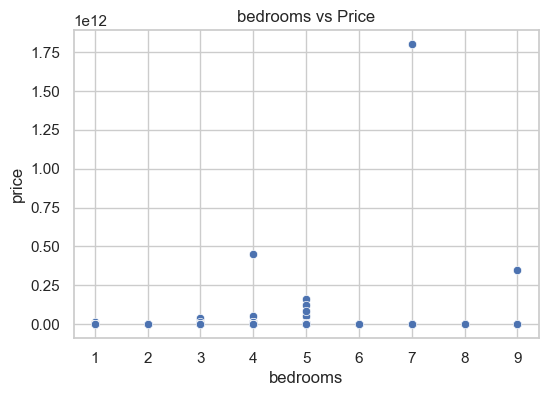

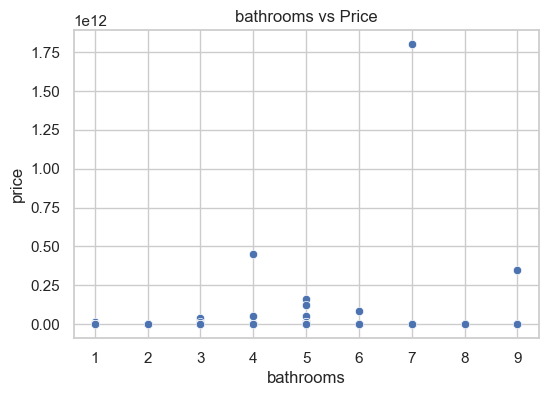

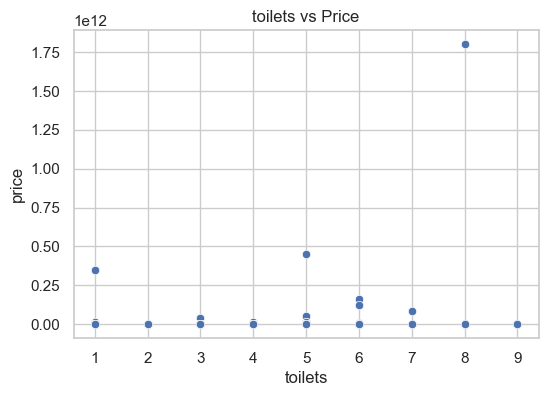

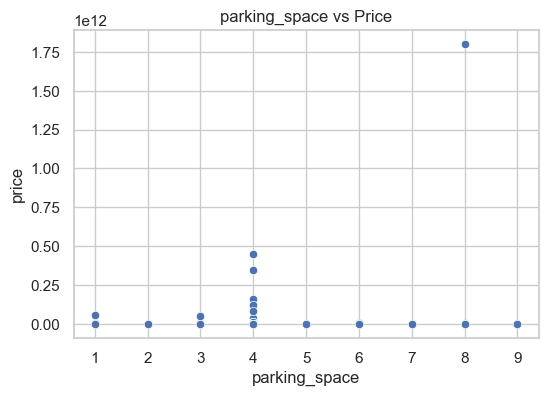

In [24]:
# Numeric features vs Price
num_cols = ["bedrooms", "bathrooms", "toilets", "parking_space"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="price")
    plt.title(f"{col} vs Price")
    plt.show()

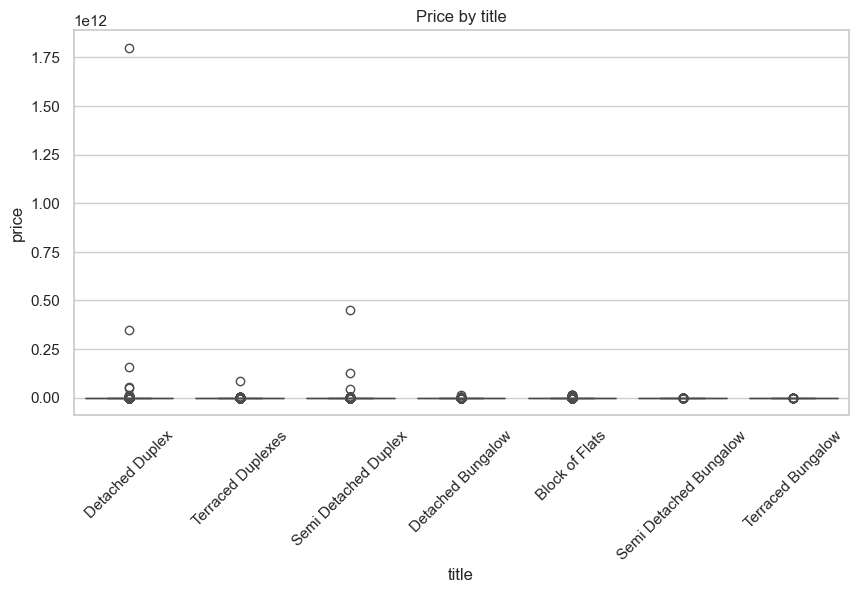

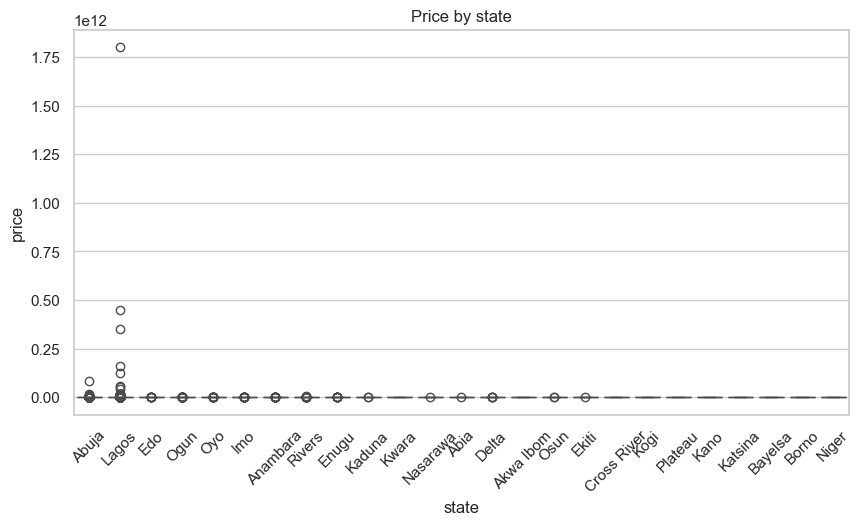

In [25]:
# Categorical features vs Price
cat_cols = ["title","state"]
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=col, y="price")
    plt.xticks(rotation=45)
    plt.title(f"Price by {col}")
    plt.show()


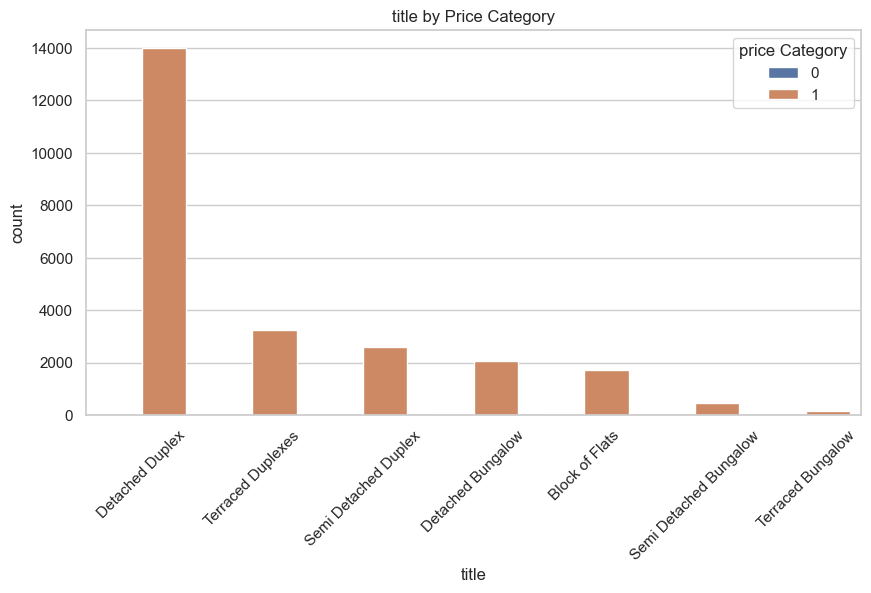

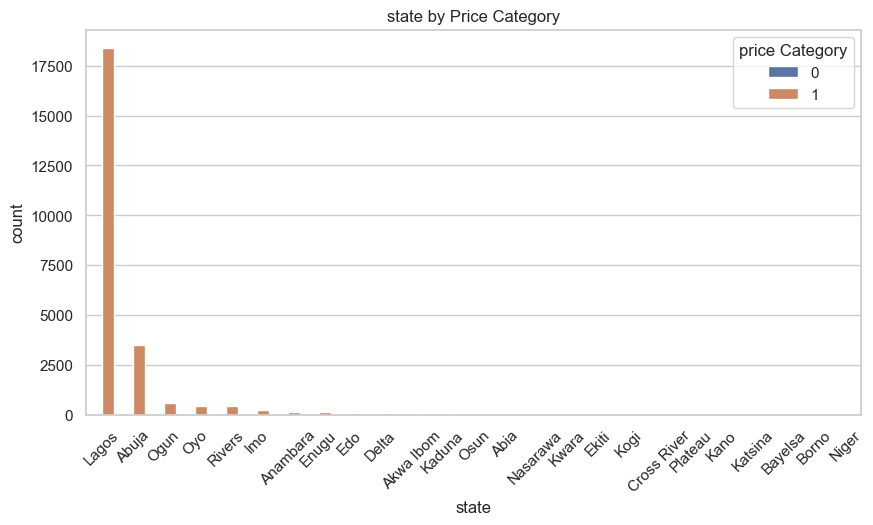

In [26]:
# Price Category vs Categorical Features
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue="price Category", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Price Category")
    plt.show()

### Handling Outliers 

In [27]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [28]:
# Check outliers in key numeric columns
num_cols = ["bedrooms", "bathrooms", "toilets", "parking_space", "price"]
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")
    if not outliers.empty:
        print(outliers[[col, "price"]].head())  # show some outlier examples

bedrooms: 1994 outliers
    bedrooms      price
7        2.0   12000000
8        1.0  200000000
33       2.0    7000000
42       2.0   30000000
43       2.0   53000000
bathrooms: 2093 outliers
    bathrooms      price
7         2.0   12000000
8         1.0  200000000
30        8.0  850000000
42        2.0   30000000
43        2.0   53000000
toilets: 2596 outliers
    toilets      price
7       3.0   12000000
8       1.0  200000000
30      8.0  850000000
42      3.0   30000000
43      3.0   53000000
parking_space: 10949 outliers
   parking_space      price
3            6.0   40000000
4            2.0   75000000
5            1.0  450000000
7            6.0   12000000
8            1.0  200000000
price: 2558 outliers
        price      price
0   450000000  450000000
1   800000000  800000000
5   450000000  450000000
14  450000000  450000000
19  350000000  350000000


In [29]:
# remove outliers from price
price_outliers = detect_outliers_iqr(df, "price")
df_clean = df[~df.index.isin(price_outliers.index)]

print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_clean.shape)

Original dataset size: (24326, 11)
Cleaned dataset size: (21768, 11)


In [30]:
# Save cleaned dataset
df_clean.to_csv("nigeria_houses_clean.csv", index=False)

print("Cleaned dataset saved as 'nigeria_houses_clean.csv'")

Cleaned dataset saved as 'nigeria_houses_clean.csv'


### Modeling 

In [31]:
# Using the transformed features 
X = X_transformed
y_reg = df["price"]
y_clf = df["price Category"]

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


In [33]:
# --- Regression Model ---
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

In [37]:
# Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)
print("Regression Results:")
print("RMSE:", rmse)
print("R² Score:", r2)


Regression Results:
RMSE: 261447971.22842902
R² Score: 0.16746108415585814


**The above Regression results shows that the modeling result is very poor , which i actually expected due to large variation in the dataset**

In [ ]:
# --- Classification Model ---
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)


In [ ]:
# Classification Metrics
acc = accuracy_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf, average="weighted")
print("\nClassification Results:")
print("Accuracy:", acc)
print("F1 Score:", f1)
print(classification_report(y_test_clf, y_pred_clf))


Classification Results:
Accuracy: 0.9989724619810934
F1 Score: 0.998961097928952
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       1.00      1.00      1.00      4843

    accuracy                           1.00      4866
   macro avg       0.95      0.93      0.94      4866
weighted avg       1.00      1.00      1.00      4866



**Classifiction metrics on the other hand is performing well , the reason behind this performance is because looking at the data set we can see it is not a classification base dataset , the category was not even define. Even with the same dataset, regression and classification differ because they learn different targets and optimize different objectives. Classification often scores higher because it only needs to predict categories, not exact numbers.Which was  what happened here**

#### Fine Tuning 

In [41]:
# Fine tuning each model to see their performance
from sklearn.linear_model import Ridge
# --- Ridge Regression Tuning ---
ridge = Ridge()
ridge_params = {
    "alpha": [0.1, 1.0, 10.0, 100.0]
}
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring="neg_root_mean_squared_error")
grid_ridge.fit(X_train_reg, y_train_reg)

print("Best Ridge Regression Params:", grid_ridge.best_params_)
print("Best RMSE:", -grid_ridge.best_score_)


Best Ridge Regression Params: {'alpha': 0.1}
Best RMSE: 3163090402.5512547


After fine tuning the Regression model it became even more worse than before

In [42]:
# --- Random Forest Classification Tuning ---
rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy")
grid_rf.fit(X_train_clf, y_train_clf)

print("\nBest Random Forest Params:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)



Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9987153134635148


### Regression Model Visualization

- Actual vs Predicted Prices
- Residuals (errors)



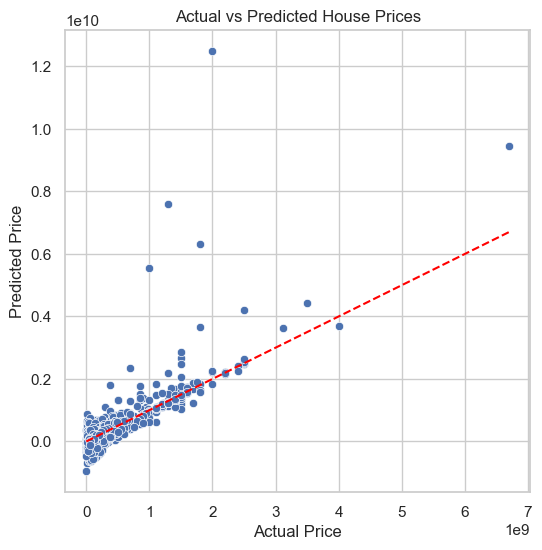

In [43]:
# --- Actual vs Predicted ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color="red", linestyle="--")
plt.show()

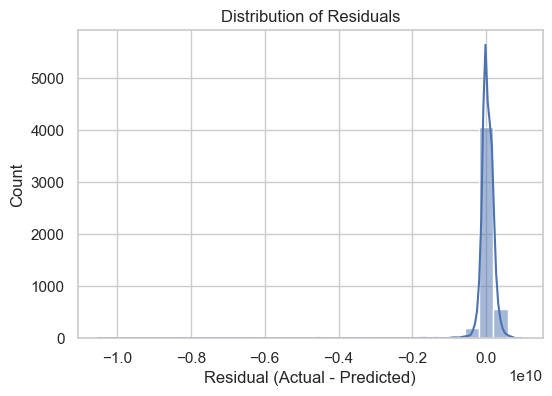

In [44]:
# --- Residuals Plot ---
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

### Classification Model Visualization
- Confusion Matrix
- Classification Report (text)

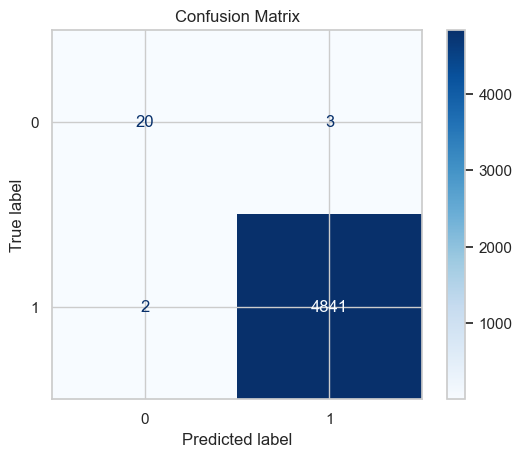

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [46]:
# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       1.00      1.00      1.00      4843

    accuracy                           1.00      4866
   macro avg       0.95      0.93      0.94      4866
weighted avg       1.00      1.00      1.00      4866



### Not all modeling always turn out to be a success , just like this one.